In [1]:
#Imports
#Will use numpy to deal with arrays and matrices 
import numpy as np 
#Will use pandas to load the dataset and manipulate it
import pandas as pd

from sklearn.model_selection import train_test_split

#Importing Support Vector Algorithmn
from sklearn.svm import SVC

#Importing Support Vector Algorithmn
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

In [2]:
#Preprocessing of data

#First, we can have a choice to use a dataset encompassing all decades, or keep the training set separate to certain years. 
#We will pick all decades, but will make it flexible for the future

#Creating a list of all of the csv file names, then using read csv to create a list of dataframes. Each dataframe holds a certain decade.
i =  ['60', '70', '80', '90', '00', '10']
dataSets = []
for decade in i:
    dataSet = pd.read_csv('datasets/dataset-of-'+decade+'s.csv')
    #Add a decade column to the dataset.
    dataSet['decade'] = int(decade)
    #Remove non-numerical dimensions. 
    dataSet = dataSet.drop(['track', 'artist', 'uri'], axis =1)
    #Append data set to a list of other datasets of other decades.
    dataSets.append(dataSet)


#combine all data sets into one dataset. From there, one can select the specific data needed based on the decade.
df = pd.concat(dataSets)

#Can now select specific data based on the decade, example:
#print(df.loc[df['decade'] == '80'])

#Let's take a look at how our data looks like
df.info()

#Let's take a look at the "shape" of our data. Standard devaiiton, mean, etc
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      41106 non-null  float64
 1   energy            41106 non-null  float64
 2   key               41106 non-null  int64  
 3   loudness          41106 non-null  float64
 4   mode              41106 non-null  int64  
 5   speechiness       41106 non-null  float64
 6   acousticness      41106 non-null  float64
 7   instrumentalness  41106 non-null  float64
 8   liveness          41106 non-null  float64
 9   valence           41106 non-null  float64
 10  tempo             41106 non-null  float64
 11  duration_ms       41106 non-null  int64  
 12  time_signature    41106 non-null  int64  
 13  chorus_hit        41106 non-null  float64
 14  sections          41106 non-null  int64  
 15  target            41106 non-null  int64  
 16  decade            41106 non-null  int64  

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000,52.925607
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006,32.562672
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000,10.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000,60.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000,80.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000,90.000000


In [3]:

#Do a score of every decade:
i =  [60, 70, 80, 90, 00, 10]
sample_range =  [60, 70]
for decade in i:
    df_n = df.loc[df['decade'] == decade]
    output = df_n['target']

    #Split data into training set and test set.
    #We will use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for this

    #In order to use this, we must get our inputs, and what we want outputed. In this case, the "target" column is the output and the other columns are the input.

    inputSet = df_n.drop('target', axis=1) #Drop target column
    X_train, X_test, y_train, y_test = train_test_split(inputSet, output, test_size=0.3, random_state=1) #random_state refers to shuffling before splitting. Here we are splitting the test and training set
    
    #Scale the range of data. This absolutley needed for SVM, or horrible scores will be produced. Note that we don't need to scale the y values or output values, since it's a binary label.
    scaler = StandardScaler()
    scaler.fit(X_train) #scale the train set
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    scaler.fit(X_test) #Scale test set
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    #Instantating the model
    svc = SVC()
    svc.fit(X_train, y_train) #Training!
    print ('Decade ' + str(decade) + ': ' + str(svc.score(X_test, y_test)))


Decade 60: 0.7639799460084844
Decade 70: 0.7673819742489271
Decade 80: 0.7863000482392668
Decade 90: 0.8466183574879227
Decade 0: 0.8382519863791147
Decade 10: 0.8109375


In [4]:
#Now, lets try with all decades combined.
output = df['target']
df_all = df
inputSet = df_all.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputSet, output, test_size=0.3, random_state=1) #random_state refers to shuffling before splitting

#Scale the range of data (all decades)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

svc = SVC(probability=True) #We enable probabilty = true, so that we can have a calibration curve, later on
svc.fit(X_train, y_train)

print ('All decades combined: ' + str(svc.score(X_test, y_test)))


All decades combined: 0.785598443074927


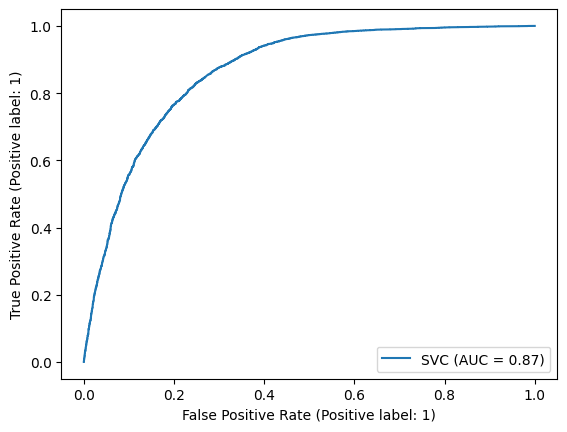

In [5]:
#RoC Curve
from sklearn.metrics import RocCurveDisplay

#Using SKLearn's python library to create an RoC Curve. Thankfully their API makes it very simple.
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

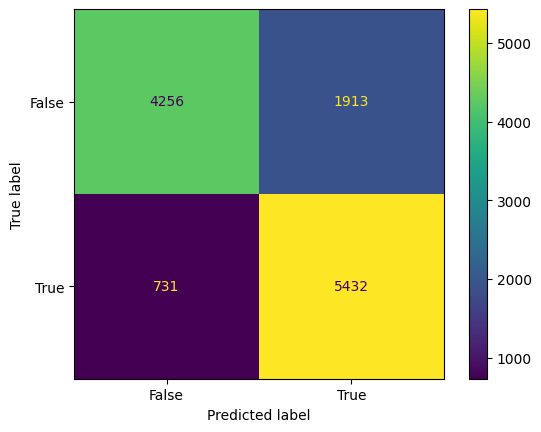

In [6]:
#Cnfusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Creating a confusion matrix from SkLearn's API. 

predictions = svc.predict(X_test) #Get an array of predictions from the test set
cm = confusion_matrix(y_test, predictions, labels=svc.classes_) #Cross reference the predictions with the true labels (y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"]) #Adding a label for the matrix
disp.plot()

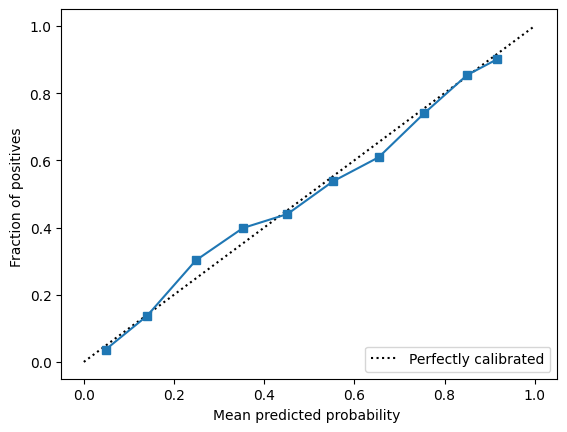

In [7]:
#Calibration Display
from sklearn.calibration import calibration_curve, CalibrationDisplay
y_prob = svc.predict_proba(X_test) [:, 1] #Select all values for only the second column, thus creating a 1-D array. Compute probabilities of possible outcomes for samples in X. The model needs to have probability information computed at training time. (Remeber why we set probabilty to true before)
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10) #Bins set to 10, just so the scale works nicer. Getting true and predicted probabilities for a calibration curve.
disp = CalibrationDisplay(prob_true, prob_pred, y_prob) #Instantiation of visuzaliation diagram
disp.plot()